In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading and Processing Data

In [6]:
measurement_set = "artificial_periodic_interference1"
# measurement_set = "artificial_periodic_interference2"

#Parameter
t_TS = 0.0009
t_SF = 0.1

### Load and exctract the data
df = pd.read_csv(f"Dataset/{measurement_set}/sniffer1.csv", sep=',' , index_col = "SF")

#get 1D-array of superframe numbers
superframe_number = df.index.to_numpy()
#get 2D-array of sniffer values (RSSI for each superframe and timeslot)
sniffer_measurement = df.to_numpy()    

In [7]:
### convert measurements to time and rssi array

time = []
RSSI = []

#go over all superframes and all timeslots
for sf_num,cur_superframe in enumerate(sniffer_measurement):
    for ts_num,cur_rssi in enumerate(cur_superframe):
        time.append(sf_num*t_SF + t_TS*ts_num)  
        RSSI.append(cur_rssi)
time = np.array(time)
RSSI = np.array(RSSI)


# Plots

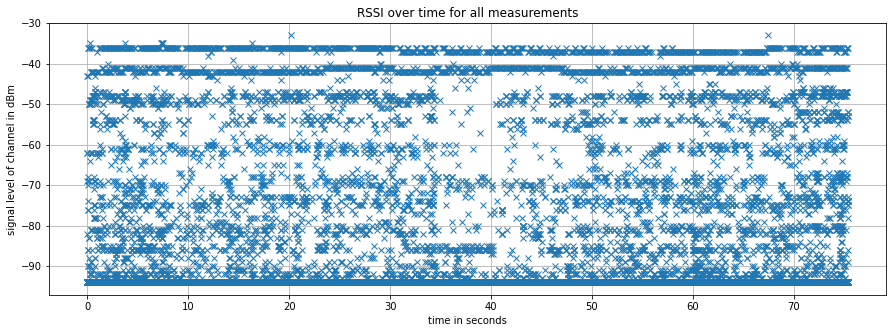

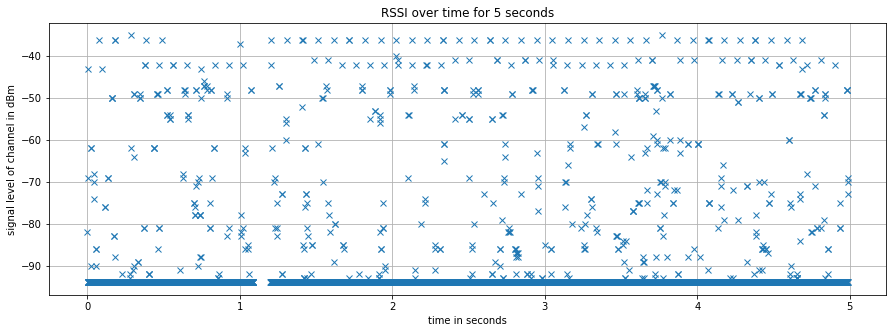

In [8]:
### Plot all Data
plt.figure(figsize=(15,5))
plt.title("RSSI over time for all measurements")
plt.plot(time,RSSI,"x")
plt.xlabel("time in seconds")
plt.ylabel("signal level of channel in dBm")
plt.grid()
plt.show()

### Plot Subset
plot_time = 5 #seconds

num_meas = int(plot_time*1000)
plt.figure(figsize=(15,5))
plt.title(f"RSSI over time for {plot_time} seconds")
plt.plot(time[:num_meas],RSSI[:num_meas],"x")
plt.xlabel("time in seconds")
plt.ylabel("signal level of channel in dBm")
plt.grid()
plt.show()